# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
import sys
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('insurance.csv')

# Fist Five Rows of Dataset

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Checking shape of Data

In [4]:
df.shape

(1338, 7)

# Information of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Checking Null Values

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# Displaying Correlation

In [7]:
df.corr()

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


# Description of Data

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

# Value counts of column smoker

In [10]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

# unique values in column children

In [11]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

## EDA

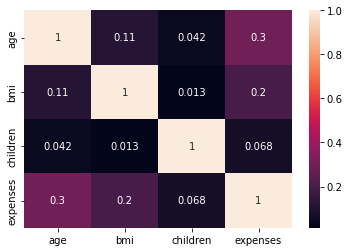

In [12]:
sns.heatmap(df.corr(),annot=True);

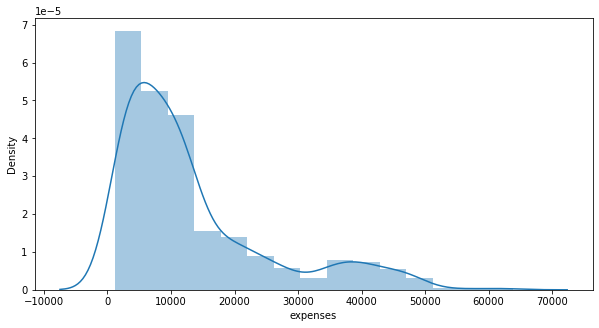

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(df['expenses'],bins=15);


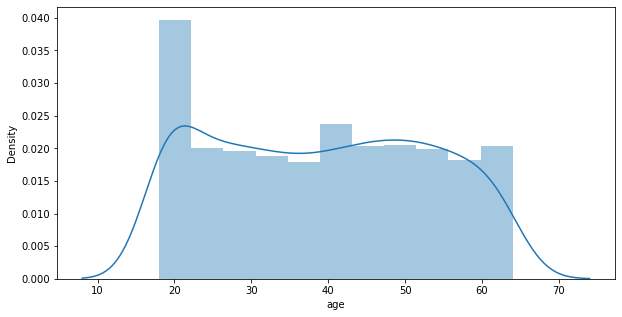

In [14]:
plt.figure(figsize=(10,5))

sns.distplot(df['age']);

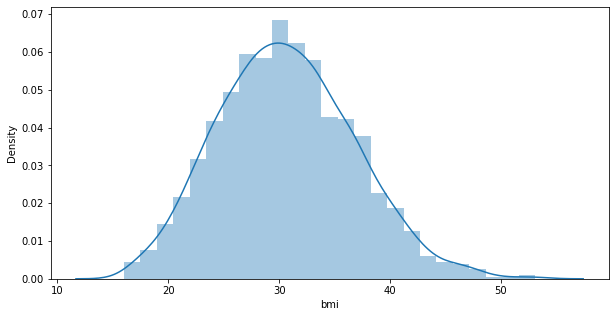

In [15]:
plt.figure(figsize=(10,5))

sns.distplot(df['bmi']);

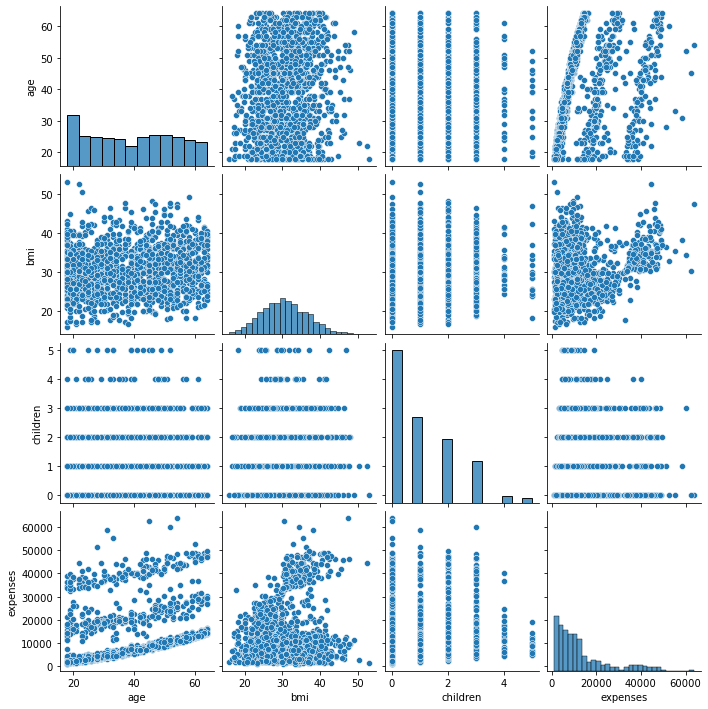

In [16]:
sns.pairplot(df);

<AxesSubplot:xlabel='children', ylabel='count'>

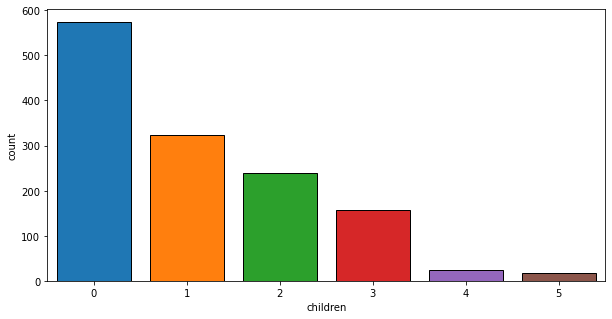

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['children'],saturation=1,edgecolor='black')

<AxesSubplot:xlabel='smoker', ylabel='count'>

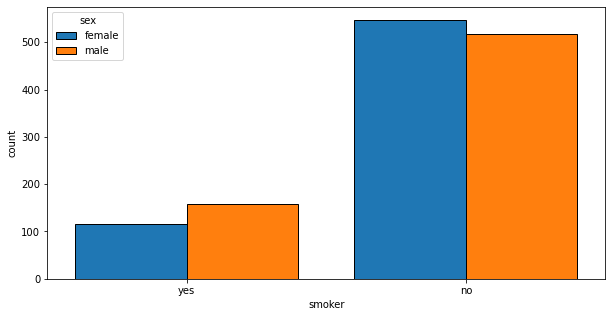

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['smoker'],saturation=1,hue=df['sex'],edgecolor='black')

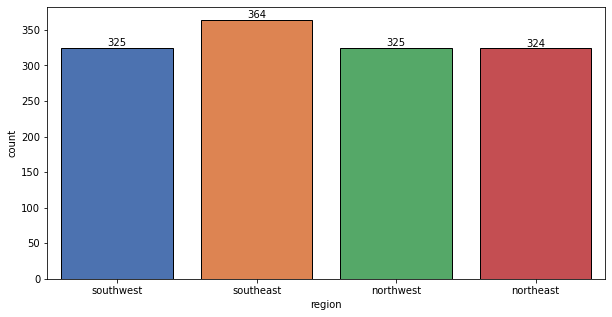

In [19]:
plt.figure(figsize=(10,5))
a=sns.countplot(x=df['region'],saturation=1,edgecolor='black',palette='deep');

for i in a.containers:
    a.bar_label(i)

In [20]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

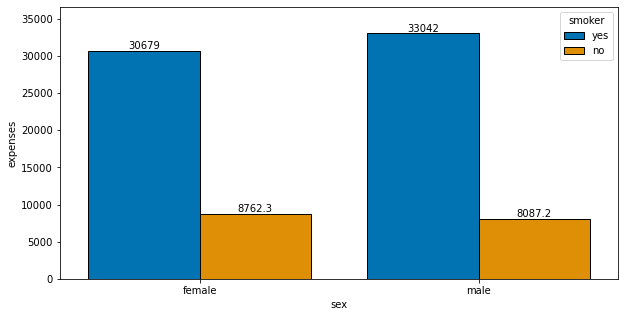

In [21]:
plt.figure(figsize=(10,5))
b=sns.barplot(x='sex',y='expenses',data=df,edgecolor='black',hue='smoker',palette='colorblind',saturation=1,errwidth=0);

for i in b.containers:
    b.bar_label(i)

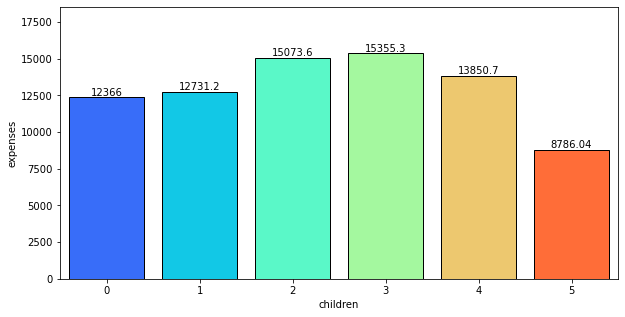

In [22]:
plt.figure(figsize=(10,5))
ax=sns.barplot(x='children',y='expenses',data=df,edgecolor='black',palette='rainbow',saturation=1,orient='v',errwidth=0);

for i in ax.containers:
    ax.bar_label(i)

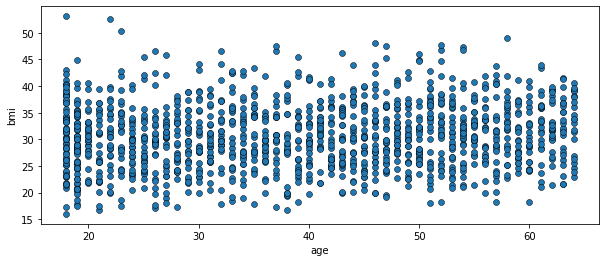

In [23]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='age',y='bmi',data=df,edgecolor='black');

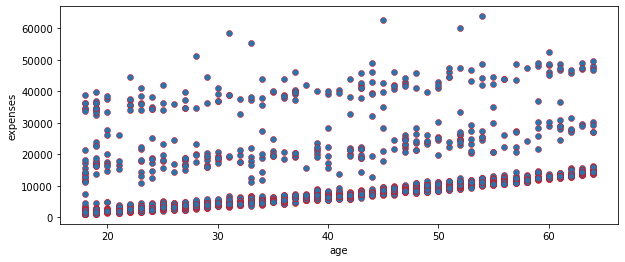

In [24]:
plt.figure(figsize=(10,4))
sns.scatterplot(x='age',y='expenses',data=df,edgecolor='red');

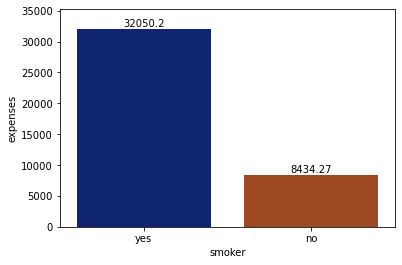

In [25]:
s=sns.barplot(x='smoker',y='expenses',data=df,errwidth=0,palette='dark');

for i in s.containers:
    s.bar_label(i)

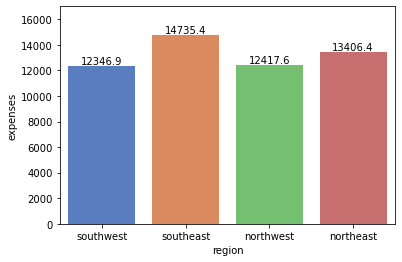

In [26]:
r=sns.barplot(x='region',y='expenses',errwidth=0,data=df,palette='muted')

for i in r.containers:
    r.bar_label(i)

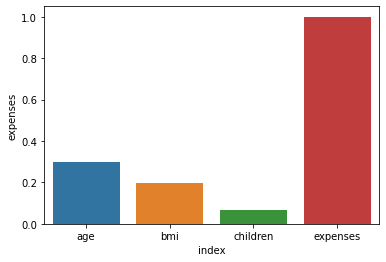

In [27]:
df1=df.corr()[["expenses"]].reset_index()

sns.barplot(x='index',y='expenses',data=df1);

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# Label encoding the categorical columns

In [29]:
le=LabelEncoder()

df['sex']=le.fit_transform(df['sex'])
df['region']=le.fit_transform(df['region'])
df['smoker']=le.fit_transform(df['smoker'])

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [31]:
df.region.unique()

array([3, 2, 1, 0])

In [32]:
X=df.drop(['expenses'],axis=1)
y=df[['expenses']]

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

### Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
lr.score(X_train,y_train)

0.7417300723597997

In [37]:
lr.score(X_test,y_test)

0.7833214205203848

In [42]:
y_pred_lr=lr.predict(X_test)

In [44]:
y_pred_lr

array([[ 8931.64285422],
       [ 7108.65837503],
       [36911.24588592],
       [ 9492.1867315 ],
       [27005.51458817],
       [10792.51319722],
       [  219.4619664 ],
       [16940.94699877],
       [ 1057.14434333],
       [11271.11976436],
       [28047.33508408],
       [ 9427.63503125],
       [ 5329.25523971],
       [38478.07916194],
       [40296.31673179],
       [37133.86645401],
       [15296.29024458],
       [35954.44751436],
       [ 9194.99722747],
       [31513.44163793],
       [ 3798.1729981 ],
       [10071.14543504],
       [ 2312.23330804],
       [ 7073.55061039],
       [11345.29924351],
       [12913.60653244],
       [14448.42340264],
       [ 6206.0789747 ],
       [ 9916.03458141],
       [ 2225.63567221],
       [ 9061.06174806],
       [13111.1535072 ],
       [ 4627.96439893],
       [ 3483.42431425],
       [ 4402.58881377],
       [12966.72664374],
       [ 1926.72036749],
       [ 8757.35074335],
       [33311.61922648],
       [32638.00629978],


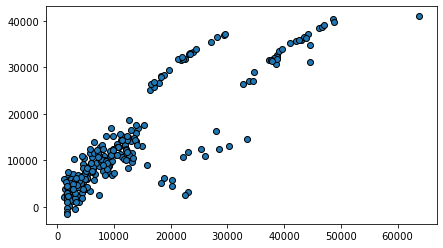

In [45]:
plt.figure(figsize=(7,4))
plt.scatter(y_test,y_pred_lr,edgecolor='black');

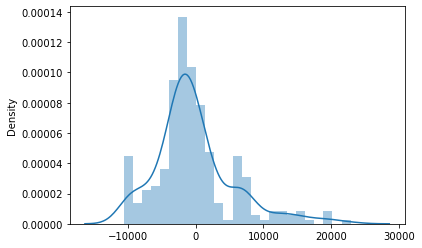

In [46]:
sns.distplot(y_test-y_pred_lr);

# Model evaluation

In [47]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [48]:
print('MAE',mean_absolute_error(y_test,y_pred_lr))
print('MSE',mean_squared_error(y_test,y_pred_lr))
print('r2_score',r2_score(y_test,y_pred_lr)*100)

MAE 4186.94010631701
MSE 33639075.08997807
r2_score 78.33214205203848


In [49]:
lr.intercept_

array([-11951.67926302])

### DecisionTreeRegressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [54]:
dtr.score(X_train,y_train)

0.9983078115527046

In [55]:
dtr.score(X_test,y_test)

0.725839569168786

In [95]:
y_pred_dt=dtr.predict(X_test)

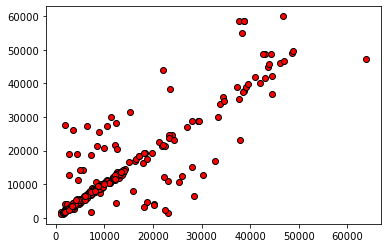

In [92]:
plt.scatter(y_test,y_pred_dt,edgecolor='black',color='red');

### KNN Regressor

In [74]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [86]:
y_pred_knn=knn.predict(X_test)

In [84]:
knn.score(X_train,y_train)

0.3864951791239516

In [85]:
knn.score(X_test,y_test)

0.15263975336965063

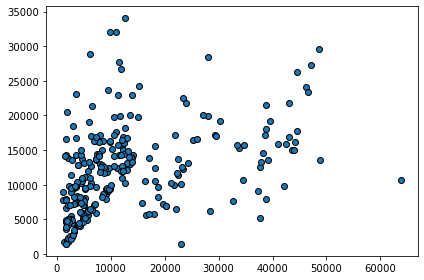

In [91]:
plt.scatter(x=y_test,y=y_pred_knn,edgecolor='black')
plt.tight_layout()

<AxesSubplot:ylabel='Density'>

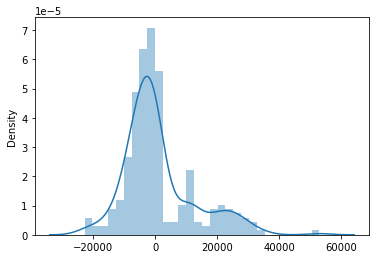

In [94]:
sns.distplot(y_test-y_pred_knn)

In [98]:
print('MAE',mean_absolute_error(y_test,y_pred_knn))
print('MSE',mean_squared_error(y_test,y_pred_knn))
print('r2_score',r2_score(y_test,y_pred_knn)*100)

MAE 7878.918813432836
MSE 131551605.29997063
r2_score 15.263975336965064


### GradientBoostinRegressor

In [111]:
from sklearn.ensemble import GradientBoostingRegressor

In [102]:
gb=GradientBoostingRegressor()

In [103]:
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [104]:
gb.score(X_train,y_train)

0.8975439083253705

In [105]:
gb.score(X_test,y_test)

0.8753180964375191

In [106]:
y_pred_gb=gb.predict(X_test)

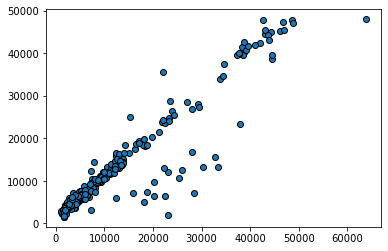

In [109]:
plt.scatter(y_test,y_pred_gb,edgecolor='black');